# Model PDFs and CDFs  
These figures display the model probability density functions (PDFs) and cumulative distribution functions (CDFs).
When using the data, you can adjust the following parameters: x_max, m_min, m_max, alpha, and binwidth.

Parameters : 
* x_max : the maximum mass that you want to draw. It should be over than m_max. 
* m_min : the minimum cutoff of the model
* m_max : the maximum cutoff of the model
* alpha : the spectral index of the model
* binwidth : the bin width of the model. when you choose your binwidth, it should be controlled like below equation  
$\text{binwidth}=\frac{\text{Data}_\text{max}-\text{Data}_\text{min}}{\text{number of bins}}$

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

GWTC_BBH=pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',delim_whitespace=True,encoding='utf-8',na_values="NaN")
m1=GWTC_BBH['m1_median'].round(1)

class Model_plot:
    def __init__(self, x_max, m_min, m_max, alpha, binwidth):
        self.x_max=x_max
        self.m_min=m_min
        self.m_max=m_max
        self.alpha=alpha
        self.binwidth=binwidth
        self.model_centers,self.model_pdf = self.model_pdf_result()
        self.min_idx=np.argmax(self.model_pdf>0)
        self.max_idx=len(self.model_pdf)-1-np.argmax(self.model_pdf[::-1]>0)
        self.model_mass_plot, self.model_pdf_plot = self.model_pdf_plot_result()
        self.model_cdf=self.model_cdf_result()
    def model_pdf_result(self):
        model_bins=np.arange(self.m_min,self.x_max+self.binwidth,self.binwidth)
        model_pdf=np.where((model_bins>self.m_min)&(model_bins<self.m_max),model_bins**(-self.alpha),0)
        min_idx=np.argmax(model_pdf>0)
        max_idx=len(model_pdf)-1-np.argmax(model_pdf[::-1]>0)
        model_pdf_norm=(1-self.alpha)/(model_bins[max_idx]**(1-self.alpha)-model_bins[min_idx]**(1-self.alpha))
        model_pdf=model_pdf_norm*model_pdf
        model_centers=model_bins
        return model_centers,model_pdf
    def model_pdf_plot_result(self):
        model_mass_plot=self.model_centers[self.min_idx:self.max_idx]
        model_pdf_plot=self.model_pdf[self.min_idx:self.max_idx]
        return model_mass_plot,model_pdf_plot
    def power_law(self,x) : return x**(-self.alpha) 
    def integrate(self,f,a,b) :
        t,w = np.polynomial.legendre.leggauss(100)
        x=0.5*(b-a)*t+0.5*(b+a)
        return 0.5*(b-a)*np.sum(w*f(x))
    def model_cdf_result(self):
        model_edges=np.hstack([self.model_centers-self.binwidth/2,self.model_centers[-1]+self.binwidth/2])
        model_cdf_norm=(1-self.alpha)/(model_edges[self.max_idx]**(1-self.alpha)-model_edges[self.min_idx]**(1-self.alpha))
        model_cdf=np.zeros_like(self.model_centers)
        model_cdf[self.min_idx:self.max_idx]=np.array([
            model_cdf_norm*self.integrate(lambda x: self.power_law(x), model_edges[self.min_idx],m)
            for m in model_edges[self.min_idx+1:self.max_idx+1]
        ])
        model_cdf[self.max_idx:]=model_cdf[self.max_idx-1]
        return model_cdf

/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_63530/2345056542.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  GWTC_BBH=pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',delim_whitespace=True,encoding='utf-8',na_values="NaN")


[11.27948718 13.75897436 16.23846154 18.71794872 21.1974359 ]
[ 4.47948718  6.95897436  9.43846154 11.91794872 14.3974359 ]


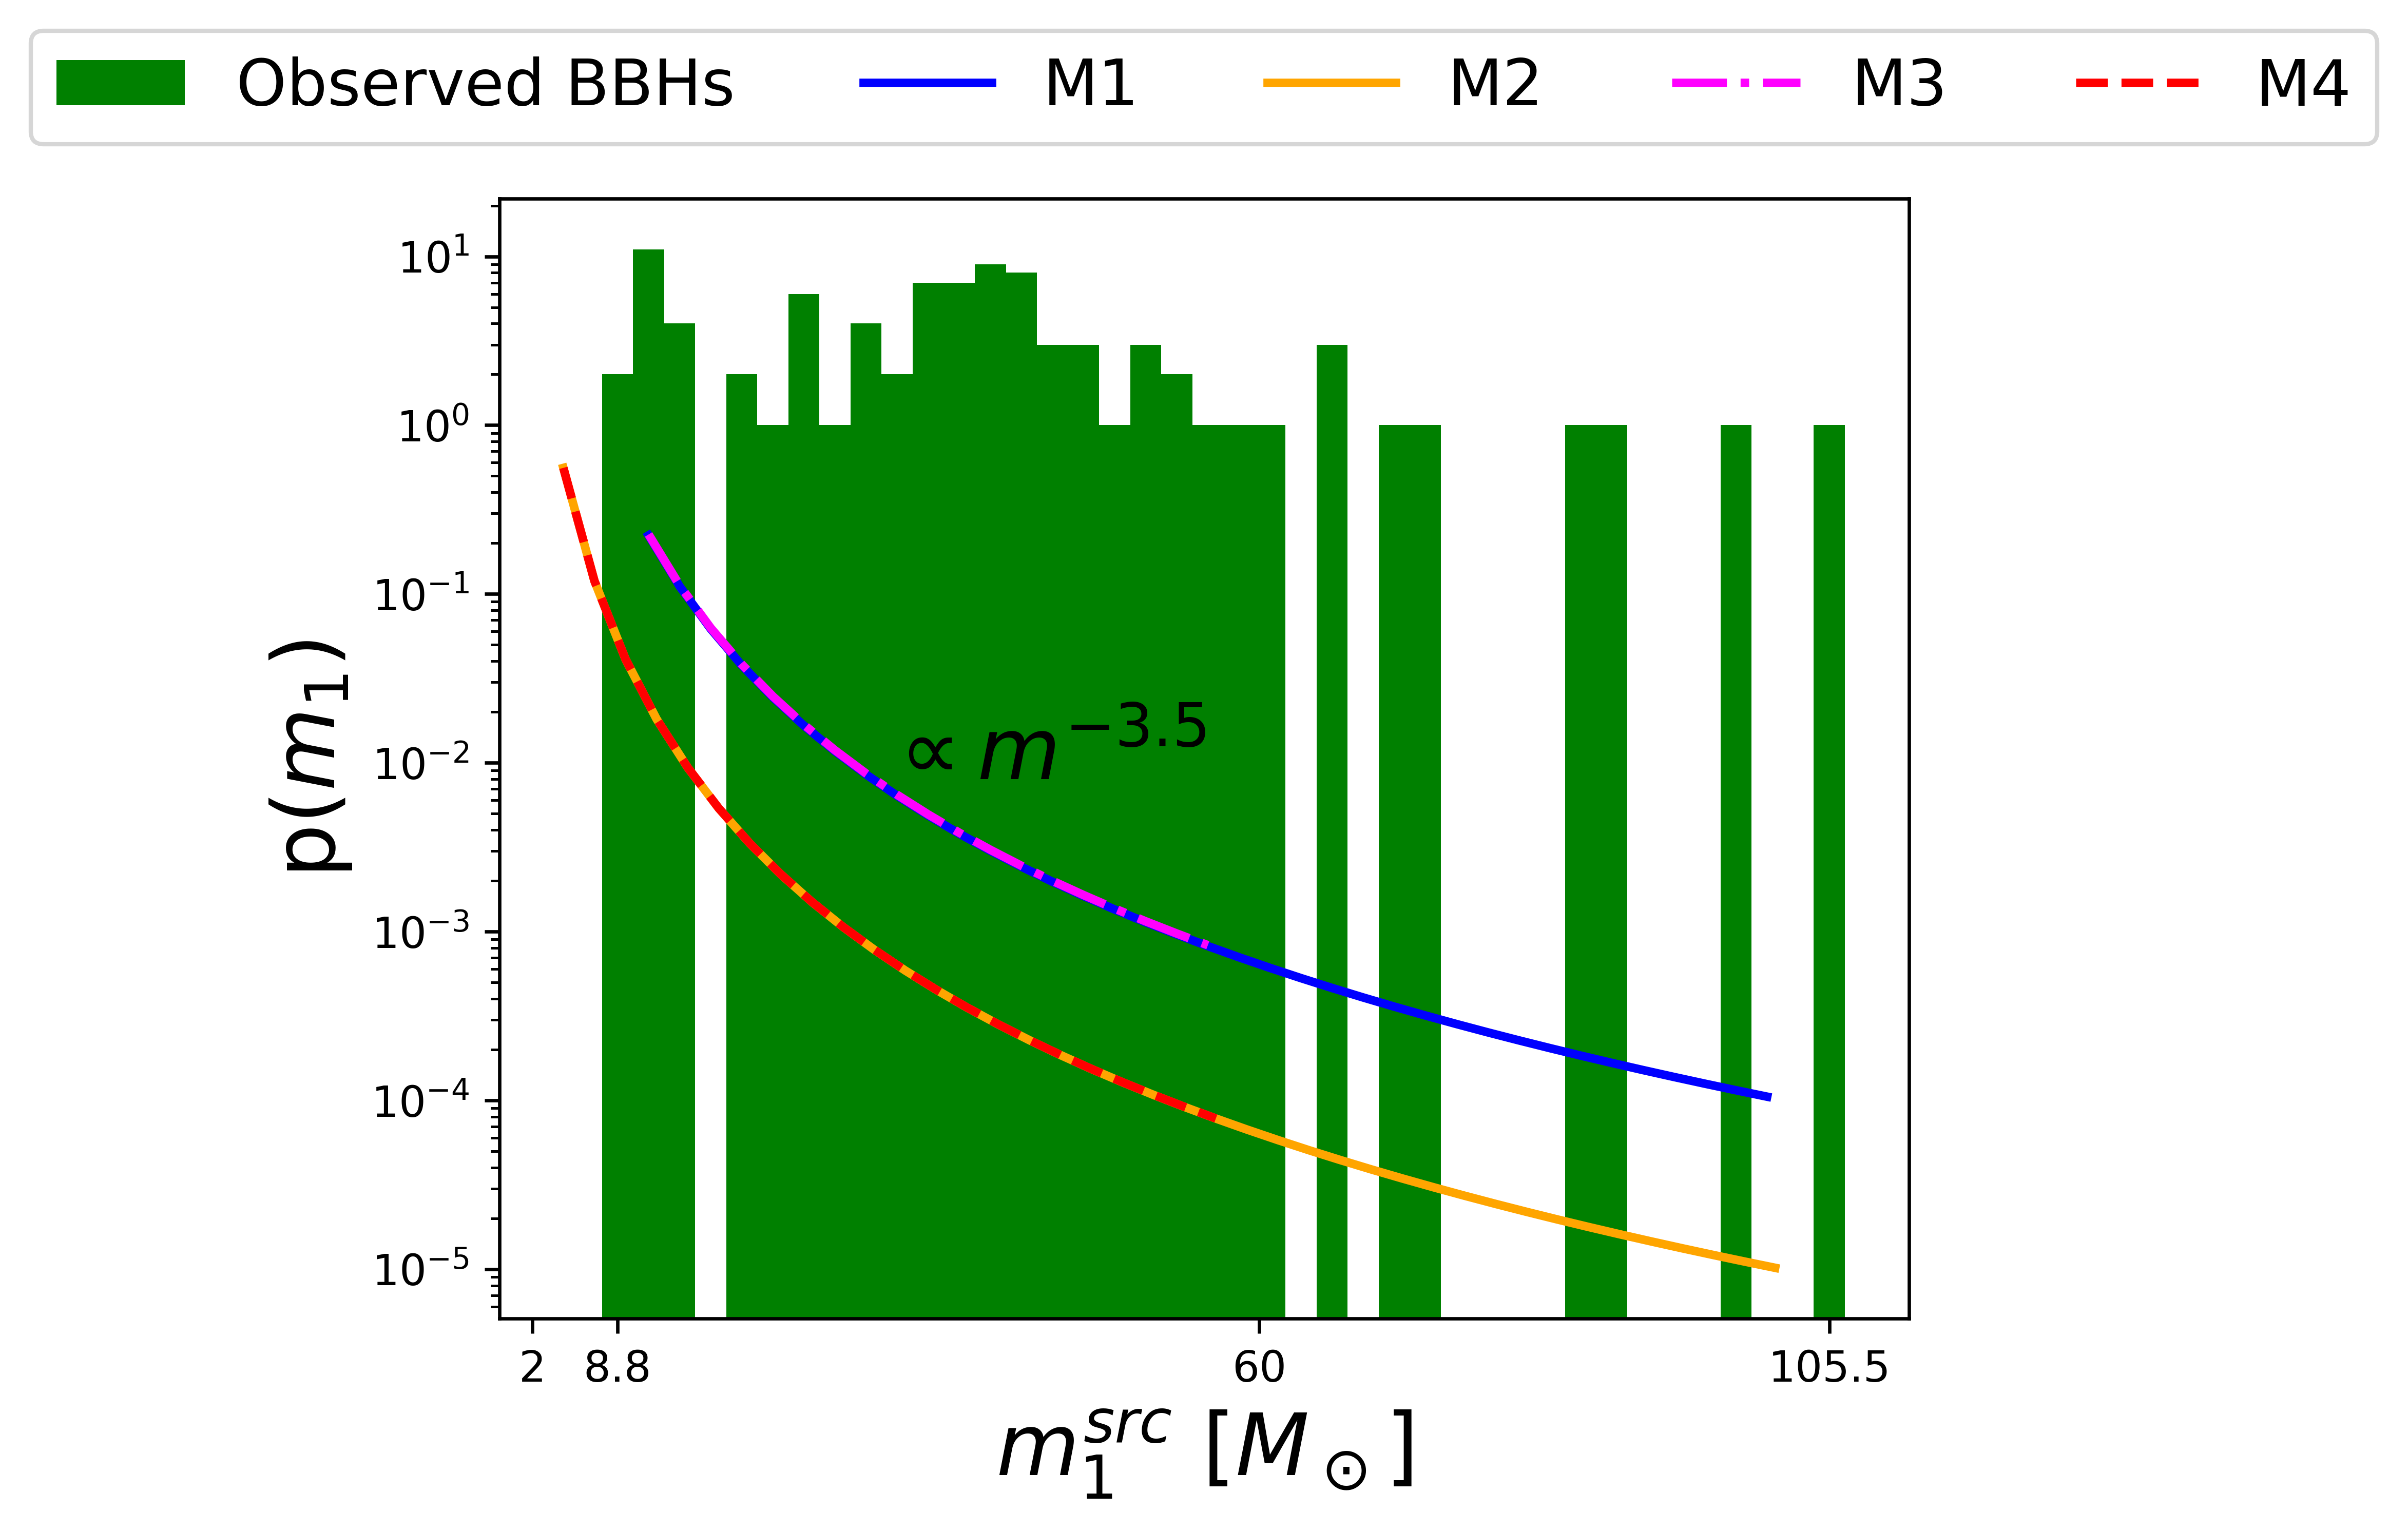

In [2]:
binwidth=(max(m1)-min(m1))/39
data_start=8.8-binwidth/2
data_end=105.5+binwidth/2
model_binwidth=(max(m1)-min(m1))/39
model1=Model_plot(x_max=150,m_min=8.8,m_max=105.5,binwidth=model_binwidth,alpha=3.5)
model2=Model_plot(x_max=150,m_min=2,m_max=105.5,binwidth=model_binwidth,alpha=3.5)
model3=Model_plot(x_max=150,m_min=8.8,m_max=60,binwidth=model_binwidth,alpha=3.5)
model4=Model_plot(x_max=150,m_min=2,m_max=60,binwidth=model_binwidth,alpha=3.5)

plt.figure(figsize=(15/2.54,12/2.54),dpi=600)
plt.hist(m1,bins=np.arange(data_start,data_end+binwidth,binwidth),color='green',label='Observed BBHs')
plt.plot(model1.model_mass_plot,model1.model_pdf_plot,linewidth=2,label='M1',color='blue',linestyle='-')
plt.plot(model2.model_mass_plot,model2.model_pdf_plot,linewidth=2,label='M2',color='orange')
plt.plot(model3.model_mass_plot,model3.model_pdf_plot,linewidth=2,label='M3',color='magenta',linestyle='-.')
plt.plot(model4.model_mass_plot,model4.model_pdf_plot,linewidth=2,label='M4',color='red',linestyle='--')
plt.yscale('log')
#plt.xscale('log')
plt.xticks([2,8.8,60,105.5],[2,8.8,60,105.5])
plt.xlabel(r"$m_1^{src}~[M_\odot]$",fontsize=20)
plt.ylabel(r'p($m_1$)',fontsize=20)
plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5,1.02),
    ncol=5,
    frameon=True,
    fontsize=15
)
plt.text(30,0.008,r"$\propto m^{-3.5}$",fontsize=20)
print(model1.model_mass_plot[0:5])
print(model2.model_mass_plot[0:5])


[11.27948718 13.75897436 16.23846154 18.71794872 21.1974359 ]
[ 4.47948718  6.95897436  9.43846154 11.91794872 14.3974359 ]


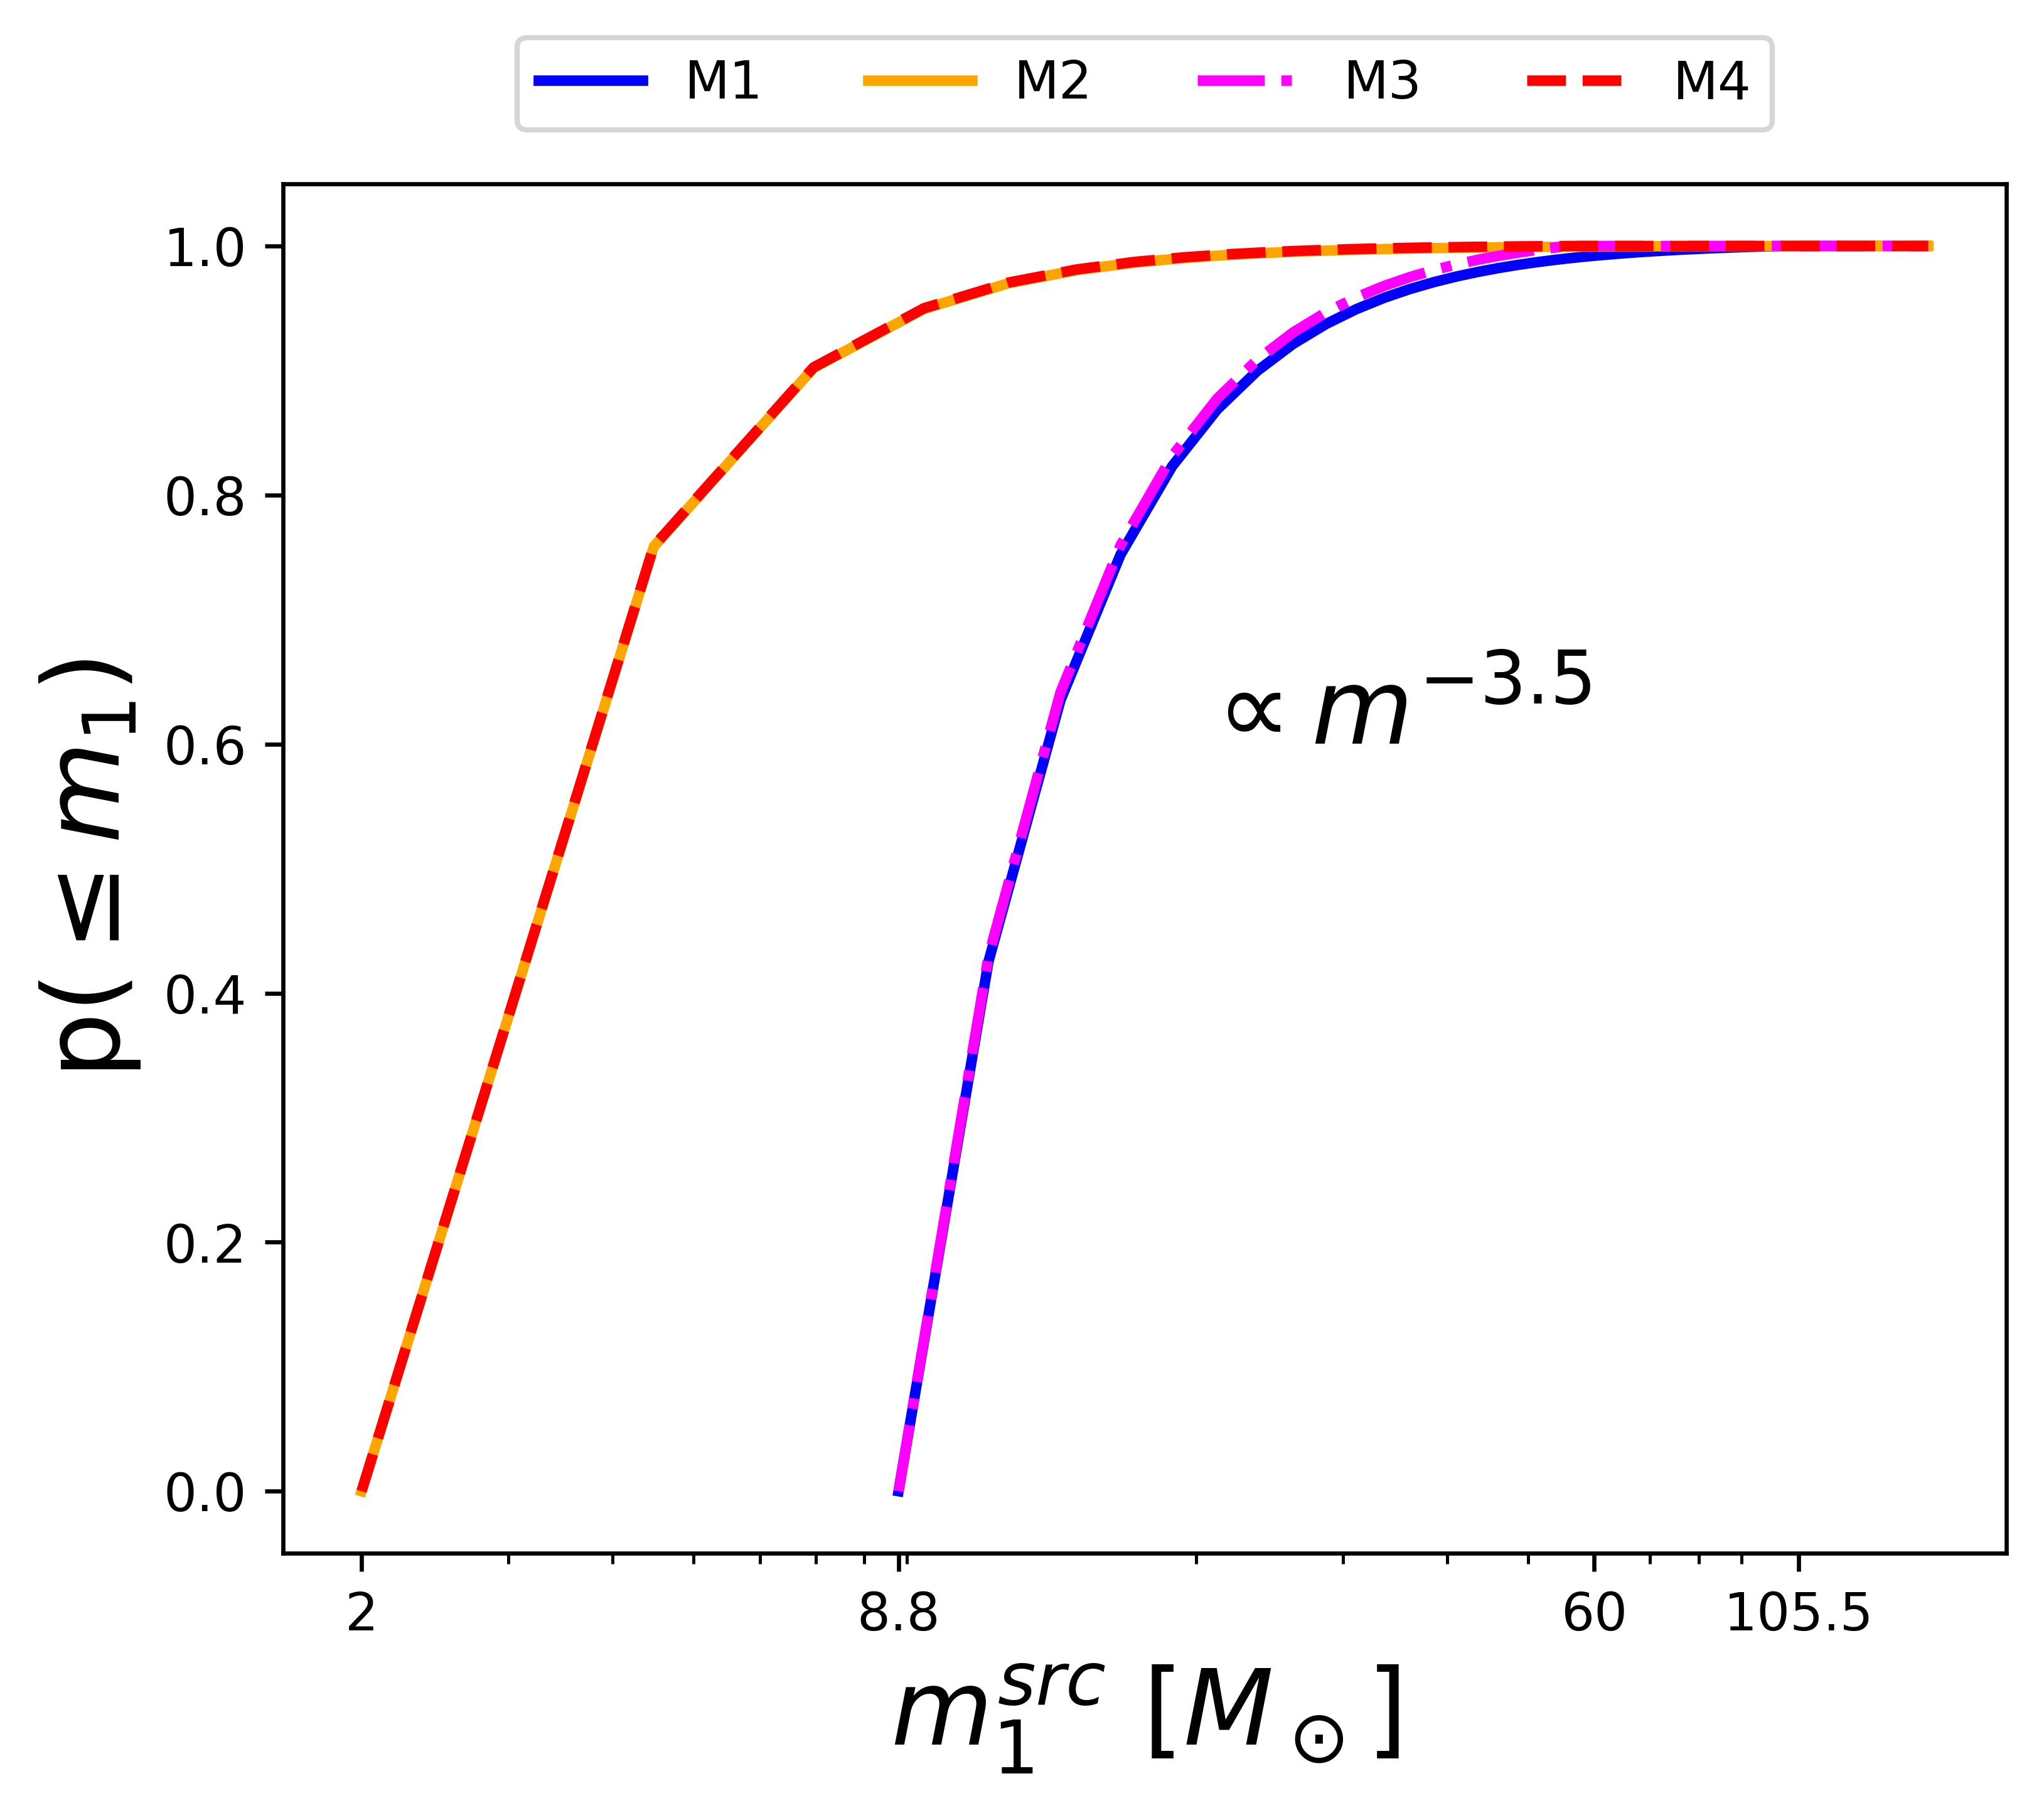

In [5]:
binwidth=(max(m1)-min(m1))/39
data_start=8.8-binwidth/2
data_end=105.5+binwidth/2
model_binwidth=(max(m1)-min(m1))/39
model1=Model_plot(x_max=150,m_min=8.8,m_max=105.5,binwidth=model_binwidth,alpha=3.5)
model2=Model_plot(x_max=150,m_min=2,m_max=105.5,binwidth=model_binwidth,alpha=3.5)
model3=Model_plot(x_max=150,m_min=8.8,m_max=60,binwidth=model_binwidth,alpha=3.5)
model4=Model_plot(x_max=150,m_min=2,m_max=60,binwidth=model_binwidth,alpha=3.5)

plt.figure(figsize=(15/2.54,12/2.54),dpi=600)
#plt.hist(m1,bins=np.arange(data_start,data_end+binwidth,binwidth),color='green',label='Observed BBHs',cumulative=True,density=True)
plt.plot(model1.model_centers,model1.model_cdf,linewidth=2,label='M1',color='blue',linestyle='-')
plt.plot(model2.model_centers,model2.model_cdf,linewidth=2,label='M2',color='orange')
plt.plot(model3.model_centers,model3.model_cdf,linewidth=2,label='M3',color='magenta',linestyle='-.')
plt.plot(model4.model_centers,model4.model_cdf,linewidth=2,label='M4',color='red',linestyle='--')

plt.xscale('log')
plt.xticks([2,8.8,60,105.5],[2,8.8,60,105.5])
plt.xlabel(r"$m_1^{src}~[M_\odot]$",fontsize=20)
plt.ylabel(r'p($\leq m_1$)',fontsize=20)
plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5,1.02),
    ncol=5,
    frameon=True
)
plt.text(20,0.6,r"$\propto m^{-3.5}$",fontsize=20)
print(model1.model_mass_plot[0:5])
print(model2.model_mass_plot[0:5])